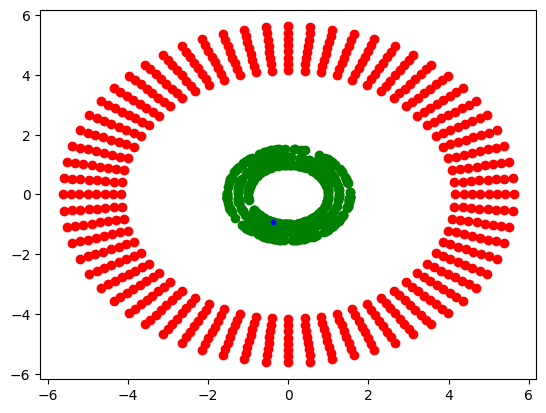

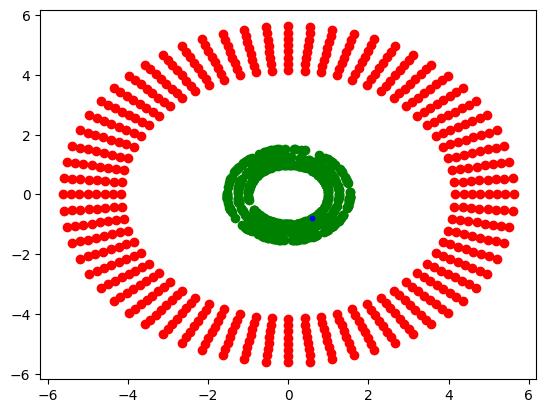

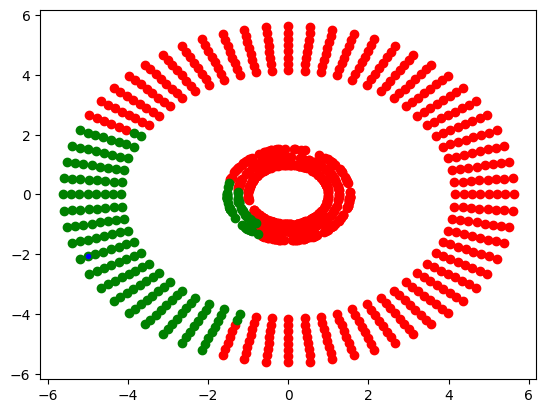

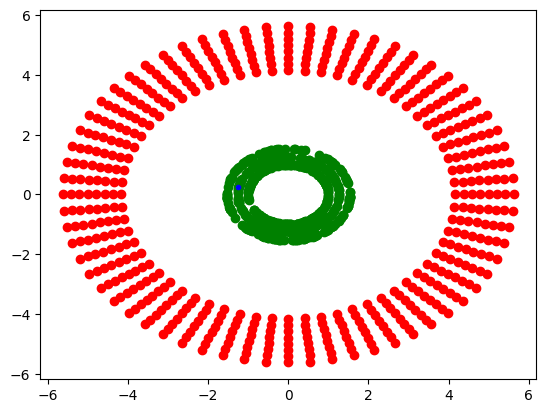

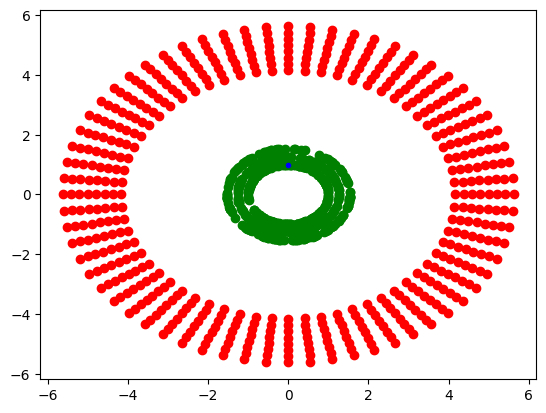

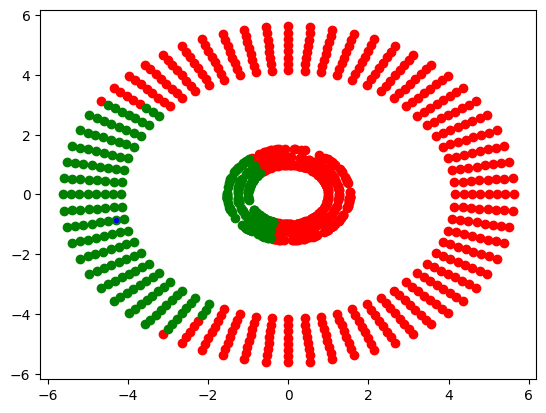

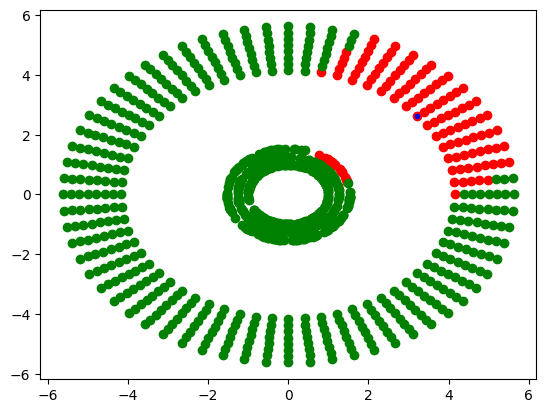

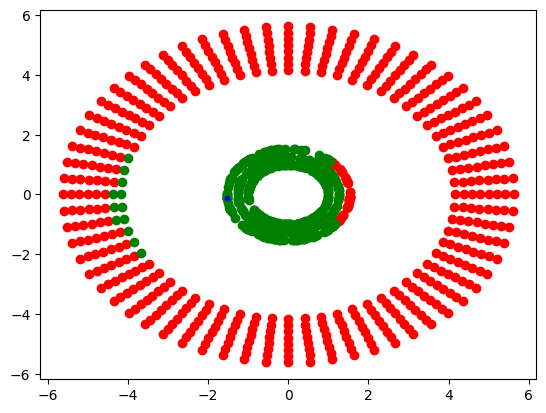

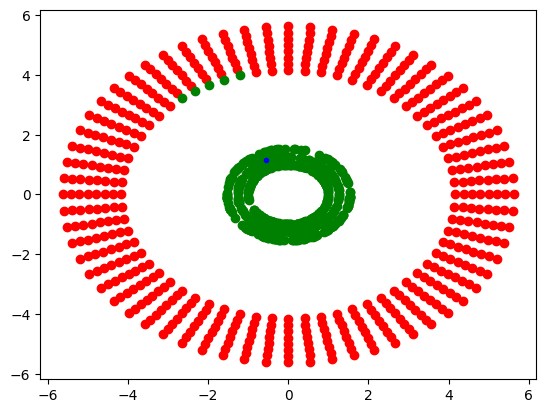

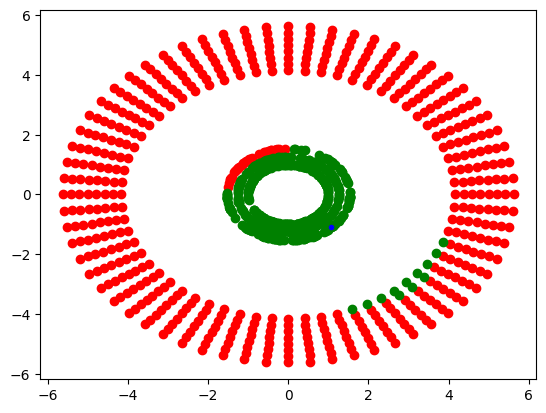

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_landmark(x, y):
    return np.exp(-0.1 * np.sum(np.square(x - y.reshape((1, -1))), axis=1)).reshape(-1, 1)

def calculate_distance(x, u):
    d = np.zeros((x.shape[0], u.shape[0]))
    for i in range(u.shape[0]):
        diff = x - u[i, :].reshape((1, -1))
        d[:, i] = np.sum(np.square(diff), axis=1)
    return d

x_data = np.genfromtxt('/content/drive/MyDrive/data/data/kmeans_data.txt', delimiter='  ')

for iter in range(10):
    random_index = (np.random.randint(250, size=1)).reshape(())
    fx_values = calculate_landmark(x_data, x_data[random_index, :])

    u_values = fx_values[:2, :]
    distance_matrix = calculate_distance(fx_values, u_values)

    cluster_labels = np.argmin(distance_matrix, axis=1)
    cluster_labels.reshape(-1, 1)

    cluster_means = np.zeros((2, fx_values.shape[1]))
    cluster_means[0, :] = np.mean(fx_values[cluster_labels == 0], axis=0)
    cluster_means[1, :] = np.mean(fx_values[cluster_labels == 1], axis=0)

    distance_matrix = calculate_distance(fx_values, cluster_means)
    cluster_labels = np.argmin(distance_matrix, axis=1)
    cluster_labels.reshape(-1, 1)

    positive_cluster = (cluster_labels == 1).reshape(cluster_labels.shape[0])
    negative_cluster = (cluster_labels == 0).reshape(cluster_labels.shape[0])

    plt.figure(iter)
    plt.scatter(x_data[positive_cluster, 0], x_data[positive_cluster, 1], c='r')
    plt.scatter(x_data[negative_cluster, 0], x_data[negative_cluster, 1], c='g')
    plt.plot(x_data[random_index, 0], x_data[random_index, 1], 'b.')

plt.show()
